<a href="https://colab.research.google.com/github/kl01abhinav2-coder/MY_TRAVEL/blob/main/major_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

#GDP

##Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = '/content/drive/MyDrive/DSA/Data/weoapr2025all.xls'
# Read the file as a tab-separated text dataset (not real Excel) using latin1 encoding to avoid decoding errors
weo = pd.read_csv(filepath, sep='\t', encoding='latin1') #\t works as a tab key and encoding='latin1' this used to read special characters correctly
weo.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2022,2023,2024,2025,2026,2027,2028,2029,2030,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,032.71","1,056.12",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,Units,"See notes for: Gross domestic product, consta...",NaN,...,-6.24,2.267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,283.44","1,350.91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,14.501,17.248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,86.149,91.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0


##Data Understanding

In [ ]:
weo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               8624 non-null   int64  
 1   ISO                            8624 non-null   object 
 2   WEO Subject Code               8624 non-null   object 
 3   Country                        8624 non-null   object 
 4   Subject Descriptor             8624 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8624 non-null   object 
 7   Scale                          8624 non-null   object 
 8   Country/Series-specific Notes  7648 non-null   object 
 9   1980                           3861 non-null   object 
 10  1981                           3995 non-null   object 
 11  1982                           4039 non-null   object 
 12  1983                           4079 non-null   o

In [ ]:
weo['WEO Subject Code'].unique()

array(['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D',
       'NGDPRPC', 'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC',
       'NGAP_NPGDP', 'PPPSH', 'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI',
       'PCPIPCH', 'PCPIE', 'PCPIEPCH', 'TM_RPCH', 'TMG_RPCH', 'TX_RPCH',
       'TXG_RPCH', 'LUR', 'LE', 'LP', 'GGR', 'GGR_NGDP', 'GGX',
       'GGX_NGDP', 'GGXCNL', 'GGXCNL_NGDP', 'GGSB', 'GGSB_NPGDP',
       'GGXONLB', 'GGXONLB_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGXWDG',
       'GGXWDG_NGDP', 'NGDP_FY', 'BCA', 'BCA_NGDPD'], dtype=object)

##Data Preprocessing

In [ ]:
# Keep only the 'Country', 'WEO Subject Code', and columns that are years
year_cols = [c for c in weo.columns if c.isdigit() and 2003 <= int(c) <= 2025]#weo.columns helps to get all columns,
#c.isdigit() to check the columns name is a number(2003)
weo = weo[['Country', 'WEO Subject Code'] + year_cols]
weo.head()

,Country,WEO Subject Code,2003,2004,2005,2006,2007,2008,2009,2010,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Afghanistan,NGDP_R,492.903,496.209,554.91,584.658,662.65,688.247,829.924,899.956,...,"1,222.92","1,255.29","1,270.22","1,319.90","1,288.87","1,101.45","1,032.71","1,056.12",NaN,NaN
1,Afghanistan,NGDP_RPCH,8.692,0.671,11.83,5.361,13.34,3.863,20.585,8.438,...,2.164,2.647,1.189,3.912,-2.351,-14.542,-6.24,2.267,NaN,NaN
2,Afghanistan,NGDP,220.013,246.21,304.926,345.817,427.495,517.509,607.227,711.759,...,"1,222.92","1,285.46","1,327.69","1,469.60","1,547.29","1,251.17","1,283.44","1,350.91",NaN,NaN
3,Afghanistan,NGDPD,4.553,5.146,6.167,6.925,8.556,10.297,12.066,15.325,...,18.02,18.883,18.336,18.876,20.136,14.278,14.501,17.248,NaN,NaN
4,Afghanistan,PPPGDP,25.206,26.058,30.054,32.642,37.999,40.227,48.807,53.568,...,79.784,83.362,89.369,97.801,100.898,85.768,86.149,91.272,NaN,NaN


In [ ]:
# Keep only rows with WEO Subject Codes corresponding to required indicators
needed_codes = [
    'NGDP_R',        # GDP constant prices (TARGET)
    'NGDP_RPCH',     # GDP growth rate
    'NGDPPC',        # GDP per capita
    'PPPGDP',        # GDP at PPP
    'NGDP_D'         # GDP deflator
]
#.isin(needed_codes) checks if the value is in the list, and keep rows match with this
weo = weo[weo['WEO Subject Code'].isin(needed_codes)]
weo.head()

,Country,WEO Subject Code,2003,2004,2005,2006,2007,2008,2009,2010,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,Afghanistan,NGDP_R,492.903,496.209,554.91,584.658,662.65,688.247,829.924,899.956,...,"1,222.92","1,255.29","1,270.22","1,319.90","1,288.87","1,101.45","1,032.71","1,056.12",NaN,NaN
1,Afghanistan,NGDP_RPCH,8.692,0.671,11.83,5.361,13.34,3.863,20.585,8.438,...,2.164,2.647,1.189,3.912,-2.351,-14.542,-6.24,2.267,NaN,NaN
4,Afghanistan,PPPGDP,25.206,26.058,30.054,32.642,37.999,40.227,48.807,53.568,...,79.784,83.362,89.369,97.801,100.898,85.768,86.149,91.272,NaN,NaN
5,Afghanistan,NGDP_D,44.636,49.618,54.951,59.149,64.513,75.192,73.167,79.088,...,100,102.404,104.525,111.341,120.05,113.594,124.279,127.912,NaN,NaN
8,Afghanistan,NGDPPC,"9,715.68","10,453.22","12,491.25","13,591.86","16,503.50","19,582.45","22,173.46","25,248.94",...,"35,307.47","36,064.45","36,189.88","38,909.61","39,702.35","31,201.71","31,195.38","32,034.41",NaN,NaN


In [ ]:
#the year column is in object so to convert it to numeric
weo[year_cols] = weo[year_cols].apply(pd.to_numeric, errors='coerce')
weo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 8588
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           980 non-null    object 
 1   WEO Subject Code  980 non-null    object 
 2   2003              685 non-null    float64
 3   2004              685 non-null    float64
 4   2005              682 non-null    float64
 5   2006              681 non-null    float64
 6   2007              679 non-null    float64
 7   2008              676 non-null    float64
 8   2009              676 non-null    float64
 9   2010              675 non-null    float64
 10  2011              677 non-null    float64
 11  2012              672 non-null    float64
 12  2013              672 non-null    float64
 13  2014              670 non-null    float64
 14  2015              667 non-null    float64
 15  2016              666 non-null    float64
 16  2017              663 non-null    float64
 17  2

In [ ]:
# Convert the dataset from wide format (years as separate columns) to long format
# so each row represents one country in one year with its GDP value
weo_long = weo.melt( #melt() turns columns into rows
    id_vars=['Country', 'WEO Subject Code'],
    value_vars=year_cols,# year columns are converted into rows
    var_name='Year',#new column name for years
    value_name='Value'#new column name for GDP value
)
weo_long['Year'] = weo_long['Year'].astype(int)
weo_long.head()

,Country,WEO Subject Code,Year,Value
0,Afghanistan,NGDP_R,2003,492.903
1,Afghanistan,NGDP_RPCH,2003,8.692
2,Afghanistan,PPPGDP,2003,25.206
3,Afghanistan,NGDP_D,2003,44.636
4,Afghanistan,NGDPPC,2003,NaN


In [ ]:
# Reshape the DataFrame so each WEO Subject Code becomes a separate column
# Rows are identified by 'Country' and 'Year', and values come from the 'Value' column
weo_pivot = weo_long.pivot_table(  #pivot_table() reshapes the data
    index=['Country', 'Year'],#each row will represent one country in one year
    columns='WEO Subject Code',
    values='Value'
).reset_index()#Makes Country and Year normal columns (not index)

weo_pivot.head()

WEO Subject Code,Country,Year,NGDPPC,NGDP_D,NGDP_R,NGDP_RPCH,PPPGDP
0,Afghanistan,2003,NaN,44.636,492.903,8.692,25.206
1,Afghanistan,2004,NaN,49.618,496.209,0.671,26.058
2,Afghanistan,2005,NaN,54.951,554.910,11.830,30.054
3,Afghanistan,2006,NaN,59.149,584.658,5.361,32.642
4,Afghanistan,2007,NaN,64.513,662.650,13.340,37.999


In [ ]:
weo_pivot.head()

WEO Subject Code,Country,Year,NGDPPC,NGDP_D,NGDP_R,NGDP_RPCH,PPPGDP
0,Afghanistan,2003,NaN,44.636,492.903,8.692,25.206
1,Afghanistan,2004,NaN,49.618,496.209,0.671,26.058
2,Afghanistan,2005,NaN,54.951,554.910,11.830,30.054
3,Afghanistan,2006,NaN,59.149,584.658,5.361,32.642
4,Afghanistan,2007,NaN,64.513,662.650,13.340,37.999


In [ ]:
# FILTERING: Keep only rows where GDP values are positive
# In economics, 'Real GDP' (NGDP_R) and the 'GDP Deflator' (NGDP_D) must be greater than 0.
weo_pivot = weo_pivot[
    (weo_pivot['NGDP_R'] > 0) & # Check: Is Real GDP positive?
    (weo_pivot['NGDP_D'] > 0)   # Check: Is the Price Deflator positive?
]

##Feature Engineering

In [ ]:
#Ensure correct sorting (CRITICAL for interpolation)
weo_pivot = weo_pivot.sort_values(['Country', 'Year'])

# Columns we need
cols = ['NGDPPC', 'NGDP_D', 'NGDP_RPCH', 'PPPGDP', 'NGDP_R']

# Convert columns to numeric (force errors → NaN)
for col in cols:
    weo_pivot[col] = pd.to_numeric(weo_pivot[col], errors='coerce')

#Time-series filling within each country
#(interpolate → forward fill → backward fill)
weo_pivot[cols] = (
    weo_pivot
    .groupby('Country')[cols]
    .transform(lambda x: x.interpolate(method='linear')
                          .ffill()
                          .bfill())
)
# Fill remaining gaps using Global Year Medians
# (cross-country fill for that year)
for col in cols:
    weo_pivot[col] = weo_pivot[col].fillna(
        weo_pivot.groupby('Year')[col].transform('median')
    )

# Drop any rows still containing NaN
# (should be very few or zero)
weo_pivot.dropna(subset=cols, inplace=True)


In [ ]:
# Country average GDP per capita
weo_pivot['Country_Avg_GDP'] = weo_pivot.groupby('Country')['NGDPPC'].transform('mean')

# Country average growth rate
weo_pivot['Country_Avg_Growth'] = weo_pivot.groupby('Country')['NGDP_RPCH'].transform('mean')

In [ ]:
weo_pivot['Log_NGDP_R'] = np.log1p(weo_pivot['NGDP_R'].clip(lower=0))
weo_pivot['Log_NGDP_D'] = np.log1p(weo_pivot['NGDP_D'].clip(lower=0))
#.clip(lower=0) → avoids negatives

weo_pivot['PPP_to_NGDP_Ratio'] = (
    weo_pivot['PPPGDP'] / weo_pivot['NGDP_R'].replace(0, np.nan)
)

In [ ]:
weo_pivot.replace([np.inf, -np.inf], np.nan, inplace=True)
weo_pivot.dropna(inplace=True)


In [ ]:
#GDP data is skewed. Log transformation improves model performance.
weo_pivot["Log_NGDP_R"] = np.log(weo_pivot["NGDP_R"])

In [ ]:
weo_pivot.head()

WEO Subject Code,Country,Year,NGDPPC,NGDP_D,NGDP_R,NGDP_RPCH,PPPGDP,Country_Avg_GDP,Country_Avg_Growth,Log_NGDP_R,Log_NGDP_D,PPP_to_NGDP_Ratio
0,Afghanistan,2003,460.4340,44.636,492.903,8.692,25.206,678.664611,8.806556,6.200312,3.820697,0.051138
1,Afghanistan,2004,502.8360,49.618,496.209,0.671,26.058,678.664611,8.806556,6.206997,3.924307,0.052514
2,Afghanistan,2005,591.8390,54.951,554.910,11.830,30.054,678.664611,8.806556,6.318806,4.024476,0.054160
3,Afghanistan,2006,659.0025,59.149,584.658,5.361,32.642,678.664611,8.806556,6.371027,4.096825,0.055831
4,Afghanistan,2007,696.7400,64.513,662.650,13.340,37.999,678.664611,8.806556,6.496247,4.182249,0.057344


##Exploratory Data Analysis (EDA)

In [ ]:
corr_matrix = weo_pivot.corr(numeric_only=True)
print(corr_matrix)


WEO Subject Code        Year    NGDPPC    NGDP_D    NGDP_R  NGDP_RPCH  \
WEO Subject Code                                                        
Year                1.000000  0.687029  0.296225 -0.006585  -0.107923   
NGDPPC              0.687029  1.000000  0.223810  0.037482  -0.083243   
NGDP_D              0.296225  0.223810  1.000000  0.006155  -0.044711   
NGDP_R             -0.006585  0.037482  0.006155  1.000000   0.041261   
NGDP_RPCH          -0.107923 -0.083243 -0.044711  0.041261   1.000000   
PPPGDP              0.111193  0.092919  0.023255  0.519076  -0.009580   
Country_Avg_GDP     0.089044  0.545413  0.027992 -0.074774   0.011258   
Country_Avg_Growth -0.056674  0.019875 -0.007731  0.153543   0.308961   
Log_NGDP_R          0.015781  0.138488  0.065026  0.718488   0.087142   
Log_NGDP_D          0.465590  0.488394  0.839622  0.023762  -0.077359   
PPP_to_NGDP_Ratio  -0.015754 -0.463318 -0.041784 -0.068998  -0.035725   

WEO Subject Code      PPPGDP  Country_Avg_GDP  Cou

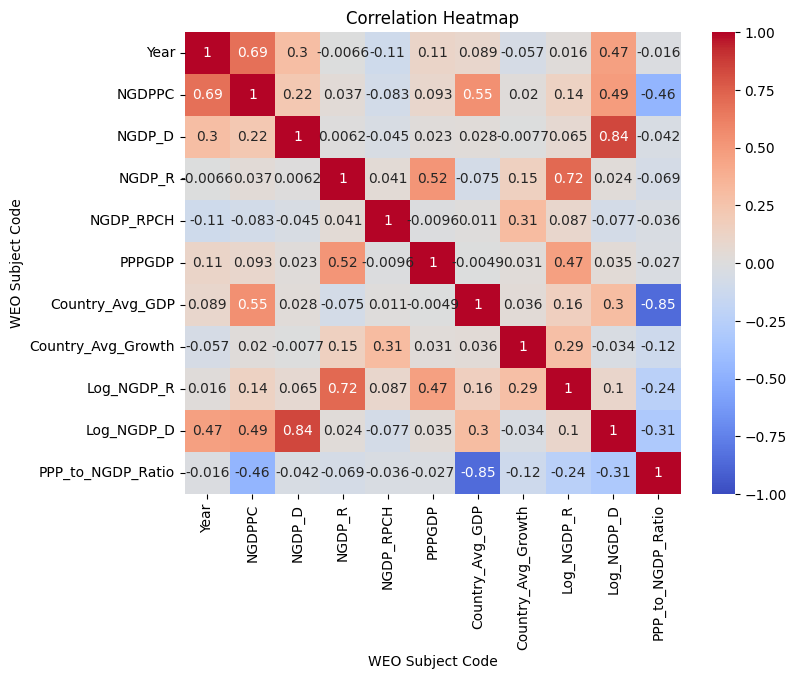

In [ ]:
# Calculate correlation matrix
corr_matrix = weo_pivot.corr(numeric_only=True)

# Visualize using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
print(corr_matrix["Log_NGDP_R"].sort_values(ascending=False))

WEO Subject Code
Log_NGDP_R            1.000000
NGDP_R                0.718488
PPPGDP                0.466179
Country_Avg_Growth    0.287157
Country_Avg_GDP       0.162354
NGDPPC                0.138488
Log_NGDP_D            0.101516
NGDP_RPCH             0.087142
NGDP_D                0.065026
Year                  0.015781
PPP_to_NGDP_Ratio    -0.236895
Name: Log_NGDP_R, dtype: float64


##Feature Selection

In [ ]:
features = [
    'NGDPPC',
    'NGDP_RPCH',
    'PPPGDP',
    'NGDP_D',
    'Log_NGDP_D',
    'PPP_to_NGDP_Ratio',
    'Country_Avg_GDP',
    'Country_Avg_Growth'
]


X = weo_pivot[features]
y = weo_pivot["Log_NGDP_R"]


In [ ]:
weo_pivot.head()

WEO Subject Code,Country,Year,NGDPPC,NGDP_D,NGDP_R,NGDP_RPCH,PPPGDP,Country_Avg_GDP,Country_Avg_Growth,Log_NGDP_R,Log_NGDP_D,PPP_to_NGDP_Ratio
0,Afghanistan,2003,460.4340,44.636,492.903,8.692,25.206,678.664611,8.806556,6.200312,3.820697,0.051138
1,Afghanistan,2004,502.8360,49.618,496.209,0.671,26.058,678.664611,8.806556,6.206997,3.924307,0.052514
2,Afghanistan,2005,591.8390,54.951,554.910,11.830,30.054,678.664611,8.806556,6.318806,4.024476,0.054160
3,Afghanistan,2006,659.0025,59.149,584.658,5.361,32.642,678.664611,8.806556,6.371027,4.096825,0.055831
4,Afghanistan,2007,696.7400,64.513,662.650,13.340,37.999,678.664611,8.806556,6.496247,4.182249,0.057344


##Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
print(X_train.isna().sum())
print(y_train.isna().sum())


WEO Subject Code
NGDPPC                0
NGDP_RPCH             0
PPPGDP                0
NGDP_D                0
Log_NGDP_D            0
PPP_to_NGDP_Ratio     0
Country_Avg_GDP       0
Country_Avg_Growth    0
dtype: int64
0


##Machine Learning Models

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("R2:", r2_score(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))


R2: 0.3579995694701261
RMSE: 1.9154460857796467


In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

print("R2:", r2_score(y_test, pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))


R2: 0.9963553867559395
RMSE: 0.14432049082815407


In [ ]:
with open("gdp_model.pkl", "wb") as f:
    pickle.dump(rf, f)


In [ ]:
print(X.columns)


Index(['NGDPPC', 'NGDP_RPCH', 'PPPGDP', 'NGDP_D', 'Log_NGDP_D',
       'PPP_to_NGDP_Ratio', 'Country_Avg_GDP', 'Country_Avg_Growth'],
      dtype='object', name='WEO Subject Code')


In [ ]:
print(X_train.shape)
print(X_test.shape)


(1921, 8)
(481, 8)


In [ ]:
len(set(X_train.index).intersection(set(X_test.index)))


0